In [122]:
# Import libraries
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# K1 function
def k(r):
    return 2 * np.arctan(r)  / np.pi
# K1 function inverse
def kinv(r):
    return np.tan(np.pi * r / 2)
# K1 function derivative
def dk(r):
    return 2 / (np.pi * (1 + r**2))
# Perturbation
def f(t):
    return np.sin(10 * np.pi * t)

In [143]:
# Parameters
r2 = 0
r1 = 1
r3 = 1.1
h = 0.05
x0 = 10

In [144]:
# Discrete-time simulation
xk = [x0]
for j in range(int(1.5*np.ceil(r1/h))):
    xk.append(kinv(max(k(np.abs(xk[-1]+h*f(j*h)))**(1-r2)-h/r1, 0)**(1/(1-r2)))*np.sign(xk[-1]))
    
xk = np.array(xk)

In [145]:
# Euler integration algorithm (will be used to compare)
def ode1(func, x0, t0, tf, h):
    t = np.arange(t0, tf+h, h)
    x = np.zeros((np.size(x0), t.size))
    x[:, 0] = x0
    for i in range(1, t.size):
        x[:, i] = h * func(t[i-1], x[:, i-1]) + x[:, i-1]
    return t, x

In [146]:
# Continuous-time predefined-time function
def sys(t, x):
    r2 = 0
    r1 = 1
    return -(k(np.abs(x))**r2 / dk(np.abs(x)) * np.sign(x)) / (r1 * (1 - r2)) + f(t)

In [147]:
# Explicit Euler simulation
t0, tf = 0, 1.5*r1
te, xe = ode1(sys, x0, t0, tf, h)
tc, xc = ode1(sys, x0, t0, tf, 1e-5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


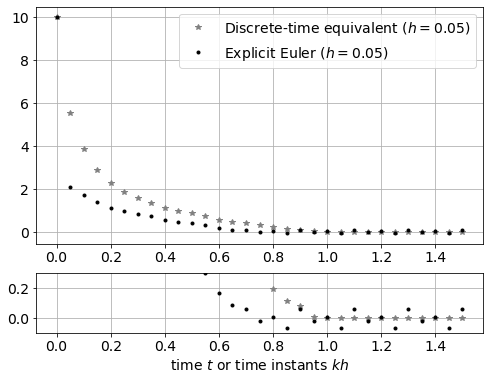

In [150]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.5)
gs1 = GridSpec(4, 1)
plt.subplot(gs1[:3,0])
#plt.plot(tc, xc[0], color=0.5*np.ones((3,)), label=r'Explicit Euler ($h=1\times 10^{-5}$)')
plt.plot(np.arange(int(1.5*np.ceil(r1/h))+1)*h, xk, '*', color=0.5*np.ones((3,)), label=f'Discrete-time equivalent ($h={h}$)')
plt.plot(te, xe[0], '.', color=0*np.ones((3,)), label=f'Explicit Euler ($h={h}$)')
plt.grid()
plt.legend(loc='best')

plt.subplot(gs1[3,0])
plt.ylim(-0.1, 0.3)
#plt.plot(tc, xc[0], color=0.5*np.ones((3,)))
plt.plot(np.arange(int(1.5*np.ceil(r1/h))+1)*h, xk, '*', color=0.5*np.ones((3,)))
plt.plot(te, xe[0], '.', color=0*np.ones((3,)))
plt.grid()
plt.xlabel('time $t$ or time instants $kh$')


plt.savefig('figures/fig3.eps', bbox_inches='tight', format='eps', dpi=1500)

In [85]:
len(xe[0]), len(xk)

(14, 14)

In [33]:
# Compare: the discretization coincides with the exact solution in the time samples (even after Tc)
np.vectorize(sol)(np.arange(int(np.ceil(r1/h))+1) * h, x0, r2, r1) - xk

NameError: name 'sol' is not defined

In [34]:
xk

array([10.        ,  4.88353571,  3.21017551,  2.30678369,  1.77586009,
        1.45946968,  1.14391828,  0.91675245,  0.79776413,  0.60780314,
        0.45088223,  0.39249936,  0.24845867,  0.10781743,  0.06871753,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [14]:
np.vectorize(sol)(np.arange(int(np.ceil(r1/h))+1) * h, x0, r2, r1)

array([1.00000000e+01, 7.65401773e+00, 6.20264257e+00, 5.21475087e+00,
       4.49791710e+00, 3.95330061e+00, 3.52491967e+00, 3.17869271e+00,
       2.89268287e+00, 2.65213078e+00, 2.44674085e+00, 2.26911231e+00,
       2.11378852e+00, 1.97665791e+00, 1.85456354e+00, 1.74504123e+00,
       1.64613942e+00, 1.55629247e+00, 1.47422975e+00, 1.39890933e+00,
       1.32946874e+00, 1.26518796e+00, 1.20546121e+00, 1.14977519e+00,
       1.09769209e+00, 1.04883628e+00, 1.00288365e+00, 9.59553124e-01,
       9.18599771e-01, 8.79809234e-01, 8.42993126e-01, 8.07985259e-01,
       7.74638503e-01, 7.42822173e-01, 7.12419831e-01, 6.83327437e-01,
       6.55451779e-01, 6.28709141e-01, 6.03024162e-01, 5.78328859e-01,
       5.54561781e-01, 5.31667286e-01, 5.09594903e-01, 4.88298788e-01,
       4.67737237e-01, 4.47872271e-01, 4.28669263e-01, 4.10096609e-01,
       3.92125448e-01, 3.74729398e-01, 3.57884334e-01, 3.41568184e-01,
       3.25760748e-01, 3.10443538e-01, 2.95599629e-01, 2.81213532e-01,
      